In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

# Ajuste de una función con dos gaussianas

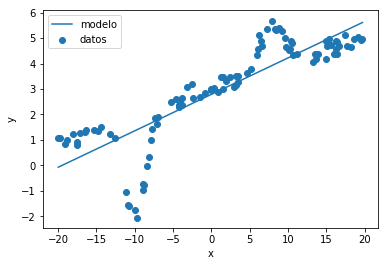

In [2]:
### Cargar y visualizar datos

data = np.loadtxt("datos/dos_picos.dat")
x = data[:,0]
y = data[:,1]
plt.figure()
plt.scatter(x,y, label='datos')

### Ajuste de la recta

def f(x, a, b):
    y = a + b * x
    return y

parameters, covariance = curve_fit(f,x,y)

x_model = np.linspace(x.min(), x.max(), 100)
y_model = f(x_model, parameters[0], parameters[1])
plt.plot(x_model, y_model, label='modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

[ 2.98584792  0.10385491 -4.01437079 -9.99274178  1.38119581  1.70672833
  7.86749125  1.6359607 ]


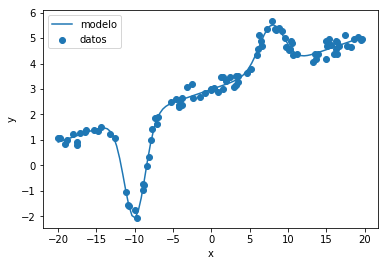

In [3]:
### ajuste la curva con dos picos

def f(x, a, b, c, d, e, f, g, h):
    y = a + (b * x) + c*np.exp(-0.5*((x-d)/e)**2) +  f*np.exp(-0.5*((x-g)/h)**2)
    return y

data = np.loadtxt("datos/dos_picos.dat")
x = data[:,0]
y = data[:,1]
plt.figure()
plt.scatter(x,y, label='datos')


parameters, covariance = curve_fit(f,x,y, p0=[1,1,-2.0, -11.0, 1.0, 1.0, 10.0, 1.0])
print(parameters)
x_model = np.linspace(x.min(), x.max(), 100)
y_model = f(x_model, parameters[0], parameters[1], parameters[2],
           parameters[3], parameters[4], parameters[5], parameters[6], 
           parameters[7])
plt.plot(x_model, y_model, label='modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Temperaturas de Munich

In [4]:
datos = np.loadtxt("datos/munich_temperatures_average_with_bad_data.txt")
temp = datos[:,1]
tiempo = datos[:,0]

(10 puntos) Grafique los datos de Temperatura (◦C) vs Tiempo (An ̃os)

Text(0.5,0,'Tiempo [años]')

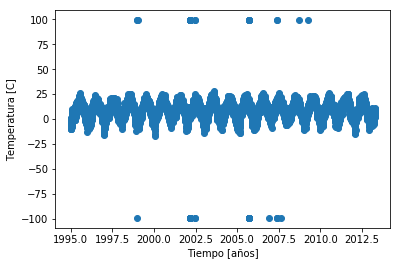

In [5]:
plt.scatter(tiempo, temp)
plt.ylabel('Temperatura [C]')
plt.xlabel('Tiempo [años]')

Use np.where() para eliminar los datos defectuosos. (Temperaturas me-
nores que -80 o mayores que 80, que pueden ser error en la toma de datos).

In [6]:
good = np.where(np.abs(temp)<50)
tiempo = tiempo[good]
temp = temp[good]

(10 puntos) Grafique de nuevo sin los datos defectuosos.

Text(0.5,0,'Tiempo [años]')

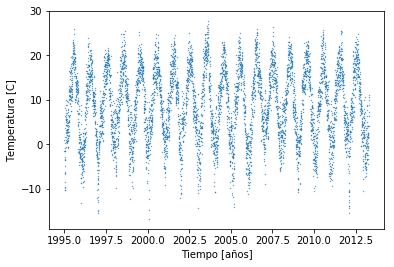

In [7]:
plt.scatter(tiempo, temp, s=0.1)
plt.ylabel('Temperatura [C]')
plt.xlabel('Tiempo [años]')

(10 puntos) Use una funci ́on de la forma:
    f (t, a, b, c, d) = a cos(bt) + c sin(dt)
    
para ajustarse a los datos.

In [8]:
def f(x, a, b, c, d):
    y = a*np.cos(b*x) + c*np.sin(d*x)
    return y

parameters, covariance = curve_fit(f,tiempo,temp, p0=[10.0,2.0*np.pi,10.0,2.0*np.pi])

(10 puntos) Indique cuales son los par ́ametros  ́optimos de ajuste.

In [9]:
print(parameters)

[-23.57621861   6.284442    32.83865881   6.28214595]


(10 puntos) Grafique los datos sin puntos defectuosos y la curva de mejor ajuste.

Text(0.5,0,'Tiempo [años]')

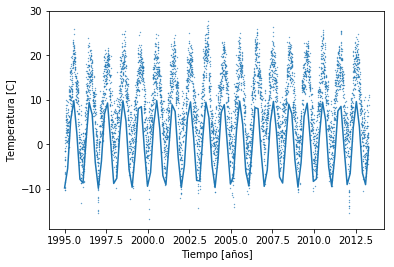

In [10]:
x_model = np.linspace(tiempo.min(), tiempo.max(), 100)
y_model = f(x_model, parameters[0], parameters[1], parameters[2],parameters[3])

plt.plot(x_model, y_model, label='modelo')

plt.scatter(tiempo, temp, s=0.1, label='datos')
plt.ylabel('Temperatura [C]')
plt.xlabel('Tiempo [años]')